# Load libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
# import data

path = "../../../../thesis/work/plasticc_dataset/"

# Train data
# train = pd.read_csv(path + "training_set.csv")
# train = pd.read_csv(path + "plasticc_train_lightcurves.csv")
# # print("Training data set")
# # display(train.head())

# metadata
# metadata_train = pd.read_csv(path + "training_set_metadata.csv")
# metadata_train = pd.read_csv(path + "plasticc_train_metadata.csv")
# # print("Metadata for training dataset")
# # display(metadata_train.head())

# # Test data
test1 = pd.read_csv(path + "plasticc_test_set_batch1.csv")
# test2 = pd.read_csv(path + "plasticc_test_set_batch2.csv")
# print("Test data set: ", test.shape)
# display(test.head())

# test metadata
metadata_test = pd.read_csv(path + "plasticc_test_metadata.csv")
# # print("Metadata for test dataset: ", metadata_test.shape)
# # display(metadata_test.head())

# # merge data
# merged_data_train = train.merge(metadata_train, on = "object_id")
merged_data_test1 = test1.merge(metadata_test, on = "object_id")
# merged_data_test2 = test2.merge(metadata_test, on = "object_id")
# merged_data = merged_data_train.merge(merged_data_test, on = "object_id")
# data = pd.concat([merged_data_train, merged_data_test])
# print("train merged data")
# display(merged_data_train.head())

# print("test merged data")
# display(merged_data_test.head())

# print("test merged data")
# display(merged_data_test.head())
# # # display(merged_data_test.head())
# # merged_data_test["object_id"].hist()
# # merged_data_train["object_id"].hist()
# # display(merged_data.head())

# # print("train data: ", merged_data_train.shape)
# print("test data: ", merged_data_test.shape)

In [3]:
# data = pd.concat([merged_data_train, merged_data_test])
print(merged_data_test1.shape)
# print(merged_data_train.shape)
# print(merged_data_test2.shape)
print("targets: ", merged_data_test1.true_target.unique())

(10855958, 31)
targets:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]


In [7]:
# print(merged_data_test1.true_target.unique())
# train_target = merged_data_train.target.unique()
# merged_data_test1_filter = merged_data_test1.loc[merged_data_test1['true_target'].isin(train_target)]

NameError: name 'train_target' is not defined

In [10]:
# amount = merged_data_test1_filter.groupby("true_target").count()
amount = merged_data_test1.groupby("true_target").count()

In [11]:
amount.true.unique().shape

AttributeError: 'DataFrame' object has no attribute 'true'

Text(0.5, 1.0, 'Classes distributions in test')

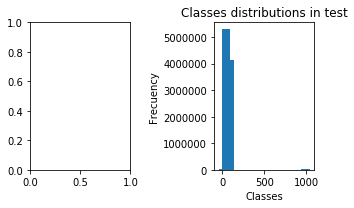

In [14]:
# plotting classes
fig, ax = plt.subplots(1, 2, figsize = (5, 3), tight_layout = True)
# ax = fig.add_axes([0,0,1,1])
# plt.bar(objects_per_target.index, objects_per_target)
# ax[0].hist(merged_data_train.loc[:, "target"], density = True)
# ax[0].set_xlabel("Classes")
# ax[0].set_ylabel("Frecuency")
# ax[0].set_title("Classes distributions in train")

ax[1].bar(amount.index, amount.object_id.values, width = 100)
# ax[1].hist(merged_data_test1_filter.true_target, bins = 14)
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Frecuency")
ax[1].set_title("Classes distributions in test")
# ax[1].hist(merged_data_test.loc[:, "target"])

# objects_per_target_train = merged_data_train.groupby("target", )["object_id"].count()
# display(objects_per_target)
# # fig, ax = plt.subplots(1, 2)
# # # ax = fig.add_axes([0,0,1,1])
# ax[0].bar(objects_per_target.index, objects_per_target)
# # ax[0].hist(merged_data_train["object_id"])

# Ploting one ligth curve

Text(0.5, 1.0, 'Light curve (Brightness in function of time)')

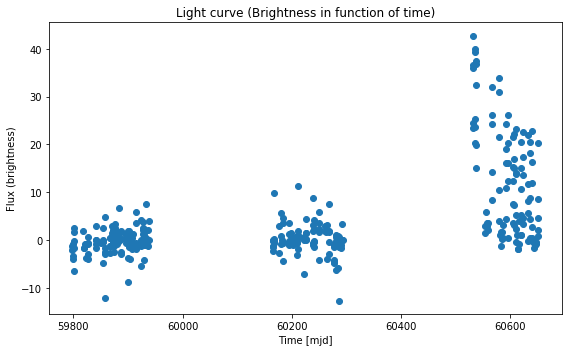

In [65]:
#print list of ids
# print("object ids: ", merged_data_train.object_id.unique())

# get one light curve
one_ligth_curve = merged_data_test1[merged_data_test1["object_id"] == 13]

#display(one_ligth_curve)
#plot light curve
fix, ax = plt.subplots(figsize = (8, 5), tight_layout = True)
ax.scatter(one_ligth_curve["mjd"], one_ligth_curve["flux"])
# ax.plot(one_ligth_curve["mjd"], one_ligth_curve["flux"])
# ax.set_title("target: " + one_ligth_curve["target"])
ax.set_xlabel("Time [mjd]")
ax.set_ylabel("Flux (brightness)")
ax.set_title("Light curve (Brightness in function of time)")

# Change name of dataset for simplicity

In [17]:
# light_curves = merged_data_train
# light_curves = merged_data_test1_filter
light_curves = merged_data_test1
# light_curves = merged_data_train[(merged_data_train["object_id"] == 615)]

print("data shape: ", light_curves.shape)
print("data columns: ", light_curves.columns)
light_curves_ = light_curves[["object_id", "mjd", "passband", "flux", "flux_err", "true_target"]]
light_curves_ = light_curves_.rename(columns={"true_target": "target"})
# ligth_curves_.head()

light_curves = light_curves_
print("labels: ", light_curves_.target.unique())

data shape:  (10855958, 31)
data columns:  Index(['object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected_bool',
       'ra', 'decl', 'ddf_bool', 'hostgal_specz', 'hostgal_photoz',
       'hostgal_photoz_err', 'distmod', 'mwebv', 'target', 'true_target',
       'true_submodel', 'true_z', 'true_distmod', 'true_lensdmu', 'true_vpec',
       'true_rv', 'true_av', 'true_peakmjd', 'libid_cadence', 'tflux_u',
       'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z', 'tflux_y'],
      dtype='object')
labels:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]


# Feature extraction

In [33]:
# get all object_ids
object_ids = light_curves["object_id"].unique()

print("There are " + str(object_ids.shape[0]) + " differentes objects, classified in "+ str(light_curves["target"].unique().shape[0]) + " differentes classes")
print(type(object_ids))

# overwrite objects ids (it's for analyze a piece of total objects's)
# objects_ids_to_analyze = object_ids.shape[0]
objects_ids_to_analyze = int(object_ids.shape[0])
# objects_ids_to_analyze = 1000
print("objects to analyze: ", objects_ids_to_analyze)
idx = np.random.randint(object_ids.shape[0], size=objects_ids_to_analyze)
object_ids = object_ids[idx]
# object_ids = object_ids[0:objects_ids_to_analyze]
# print(object_ids)

# set passband to analyze
passband = 0

features_names = ['Amplitude',
                  'AndersonDarling', 
                  'Autocor_length', 
                  'Beyond1Std', 
                  'CAR_mean',
                  'CAR_sigma', 
                  'CAR_tau', 
                  'Con', 
                  'Eta_e', 
                  'FluxPercentileRatioMid20',
                 'FluxPercentileRatioMid35', 
                  'FluxPercentileRatioMid50',
                 'FluxPercentileRatioMid65' ,
                  'FluxPercentileRatioMid80',
                 'Freq1_harmonics_amplitude_0' ,
                  'Freq1_harmonics_amplitude_1',
                 'Freq1_harmonics_amplitude_2' ,
                  'Freq1_harmonics_amplitude_3',
                 'Freq1_harmonics_rel_phase_0' ,
                  'Freq1_harmonics_rel_phase_1',
                 'Freq1_harmonics_rel_phase_2' ,
                  'Freq1_harmonics_rel_phase_3',
                 'Freq2_harmonics_amplitude_0' ,
                  'Freq2_harmonics_amplitude_1',
                 'Freq2_harmonics_amplitude_2' ,
                  'Freq2_harmonics_amplitude_3',
                 'Freq2_harmonics_rel_phase_0' ,
                  'Freq2_harmonics_rel_phase_1',
                 'Freq2_harmonics_rel_phase_2' ,
                  'Freq2_harmonics_rel_phase_3',
                 'Freq3_harmonics_amplitude_0' ,
                  'Freq3_harmonics_amplitude_1',
                 'Freq3_harmonics_amplitude_2' ,
                  'Freq3_harmonics_amplitude_3',
                 'Freq3_harmonics_rel_phase_0' ,
                  'Freq3_harmonics_rel_phase_1',
                 'Freq3_harmonics_rel_phase_2' ,
                  'Freq3_harmonics_rel_phase_3' ,
                  'Gskew',
                 'LinearTrend',
                  'MaxSlope', 
                  'Mean', 
                  'Meanvariance', 
                  'MedianAbsDev', 
                  'MedianBRP',
                 'PairSlopeTrend', 
                  'PercentAmplitude',
                  'PercentDifferenceFluxPercentile',
                 'PeriodLS',
                  'Period_fit',
                  'Psi_CS', 
                  'Psi_eta' ,
                  'Q31', 
                  'Rcs', 
                  'Skew',
                 'SlottedA_length',
                  'SmallKurtosis',
                  'Std',
                  'StetsonK' ,
                  'StetsonK_AC',
                 'StructureFunction_index_21',
                  'StructureFunction_index_31',
                 'StructureFunction_index_32'
                 ]

# # Getting one ligth curve for get ist features names
# mask1 = light_curves["object_id"] == 615
# mask2 = light_curves["passband"] == passband
# lc = light_curves[(mask1 & mask2)]

# # array with required data
# lc_data = [lc.mjd, lc.flux, lc.flux_err]

# # getting features
# fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
# # get features names
# features, values = fs.extract(*lc_data)
# features_names = features
# print(features_names)

There are 32926 differentes objects, classified in 18 differentes classes
<class 'numpy.ndarray'>
objects to analyze:  32926


In [ ]:
from tqdm import tqdm_notebook
import feets.preprocess

# # get all object_ids
# object_ids = light_curves["object_id"].unique()

# print("There are " + str(object_ids.shape[0]) + " differentes objects, classified in "+ str(light_curves["target"].unique().shape[0]) + " differentes classes")
# print(type(object_ids))

# # overwrite objects ids (it's for analyze a piece of total objects's)
# # objects_ids_to_analyze = object_ids.shape[0]
# objects_ids_to_analyze = int(object_ids.shape[0])
# # objects_ids_to_analyze = 1000
# print("objects to analyze: ", objects_ids_to_analyze)
# idx = np.random.randint(object_ids.shape[0], size=objects_ids_to_analyze)
# object_ids = object_ids[idx]
# # object_ids = object_ids[0:objects_ids_to_analyze]
# # print(object_ids)

# # set passband to analyze
# passband = 0

# # features to extract from light curves

# features_names = ['Amplitude',
#                   'AndersonDarling', 
#                   'Autocor_length', 
#                   'Beyond1Std', 
#                   'CAR_mean',
#                   'CAR_sigma', 
#                   'CAR_tau', 
#                   'Con', 
#                   'Eta_e', 
#                   'FluxPercentileRatioMid20',
#                  'FluxPercentileRatioMid35', 
#                   'FluxPercentileRatioMid50',
#                  'FluxPercentileRatioMid65' ,
#                   'FluxPercentileRatioMid80',
#                  'Freq1_harmonics_amplitude_0' ,
#                   'Freq1_harmonics_amplitude_1',
#                  'Freq1_harmonics_amplitude_2' ,
#                   'Freq1_harmonics_amplitude_3',
#                  'Freq1_harmonics_rel_phase_0' ,
#                   'Freq1_harmonics_rel_phase_1',
#                  'Freq1_harmonics_rel_phase_2' ,
#                   'Freq1_harmonics_rel_phase_3',
#                  'Freq2_harmonics_amplitude_0' ,
#                   'Freq2_harmonics_amplitude_1',
#                  'Freq2_harmonics_amplitude_2' ,
#                   'Freq2_harmonics_amplitude_3',
#                  'Freq2_harmonics_rel_phase_0' ,
#                   'Freq2_harmonics_rel_phase_1',
#                  'Freq2_harmonics_rel_phase_2' ,
#                   'Freq2_harmonics_rel_phase_3',
#                  'Freq3_harmonics_amplitude_0' ,
#                   'Freq3_harmonics_amplitude_1',
#                  'Freq3_harmonics_amplitude_2' ,
#                   'Freq3_harmonics_amplitude_3',
#                  'Freq3_harmonics_rel_phase_0' ,
#                   'Freq3_harmonics_rel_phase_1',
#                  'Freq3_harmonics_rel_phase_2' ,
#                   'Freq3_harmonics_rel_phase_3' ,
#                   'Gskew',
#                  'LinearTrend',
#                   'MaxSlope', 
#                   'Mean', 
#                   'Meanvariance', 
#                   'MedianAbsDev', 
#                   'MedianBRP',
#                  'PairSlopeTrend', 
#                   'PercentAmplitude',
#                   'PercentDifferenceFluxPercentile',
#                  'PeriodLS',
#                   'Period_fit',
#                   'Psi_CS', 
#                   'Psi_eta' ,
#                   'Q31', 
#                   'Rcs', 
#                   'Skew',
#                  'SlottedA_length',
#                   'SmallKurtosis',
#                   'Std',
#                   'StetsonK' ,
#                   'StetsonK_AC',
#                  'StructureFunction_index_21',
#                   'StructureFunction_index_31',
#                  'StructureFunction_index_32'
#                  ]

# # # Getting one ligth curve for get ist features names
# # mask1 = light_curves["object_id"] == 615
# # mask2 = light_curves["passband"] == passband
# # lc = light_curves[(mask1 & mask2)]

# # # array with required data
# # lc_data = [lc.mjd, lc.flux, lc.flux_err]

# # # getting features
# # fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
# # # get features names
# # features, values = fs.extract(*lc_data)
# # features_names = features
# # print(features_names)

# # select features
# # from 0:10 and remove AndersonDarling and FluxPercentileRatioMid20 it have an error: AttributeError: 'int' object has no attribute 'keys'
# features_names = features_names[0:5].tolist()
# features_names.remove("AndersonDarling")
# # features_names.remove("FluxPercentileRatioMid20")
# print((features_names))

print("features to get: ", features_names)

# array of features values
features_values = np.zeros((len(object_ids), len(features_names)))

# array of targets (classes)
targets = np.zeros(len(object_ids))

# iterate through each object id
for index, object_id in enumerate(tqdm_notebook(object_ids)):
    print("object id: ", object_id)
    
    # Getting each ligth curve
    mask1 = light_curves["object_id"] == object_id
    mask2 = light_curves["passband"] == passband
    lc = light_curves[(mask1 & mask2)]
    
    # array with required data
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
#     # preprocessing
#     time, mag, error = feets.preprocess.remove_noise(time = lc.mjd, magnitude = lc.flux, error = lc.flux_err)
    
    # feature extraction
    fs = feets.FeatureSpace(only = features_names, data = ["time", "magnitude", "error"])
#     # get all features it can obteins with available data (parameter) 
#     fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
    features, values = fs.extract(*lc_data)
    
    # add features to features values arrays
    features_values[index, :] = values
    
    # get target of object
    targets[index] = lc.iloc[0, -1]
#     print(features.shape)
    
#     print(values)
#     print(index)

In [ ]:
# concatenate the feautres and targets of objects
features_values_with_targets = np.c_[ features_values, targets ]
# print(features_values_with_targets.shape)

# add target to name (for columns names)
columns = features_names + ["target"]
# print(columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets,    # values
                                      index = object_ids,    # 1st column as index
                                      columns = columns
                                    )

# display new dataframe
display(features_light_curves.head())
print("features light curves shape: ",features_light_curves.shape )
print("Differens objects ids: "+ str(features_light_curves.shape[0]))
display(features_light_curves.describe())
display(features_light_curves["target"].unique().shape)
display(features_light_curves["target"].unique())

In [ ]:
# store dataframe
features_light_curves.to_csv(index=True, path_or_buf = "/home/leo/Desktop/master_UACH/thesis/work/features_with_test_10MM")

In [ ]:
# features distributions
if len(features_names) < 4:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
        
        #     print(i, f)
        ax[i].hist(features_light_curves.iloc[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not plotting because it has too much features!")

# Load csv file of features

In [115]:
path = "../../../../thesis/work/"

features_light_curves = pd.read_csv(path + "features_with_test_10MM")
features_light_curves = features_light_curves.loc[:, ~features_light_curves.columns.str.contains('^Unnamed')]
features_light_curves.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,16.615357,1.000000,2.0,0.066667,0.019998,1.484705,95.664554,0.000000,72.994932,0.030919,...,3.209414,2.0,12.147315,7.557994,0.490772,0.505396,1.274882,1.396377,1.116807,42.0
1,3.696149,0.192580,1.0,0.266667,-0.434003,0.662684,1.242349,0.000000,880.661127,0.155524,...,0.119594,1.0,0.166253,1.871742,0.799001,0.723708,1.390264,1.569584,1.204851,90.0
2,3.673180,0.970349,1.0,0.380952,-4.004859,5.339861,0.052501,0.000000,279.119649,0.186202,...,0.062554,1.0,-0.990093,2.191592,0.847869,0.683030,1.669679,2.296191,1.470335,42.0
3,11.679524,1.000000,4.0,0.114286,0.106827,1.522941,18.528582,0.029412,23.826204,0.056584,...,2.487879,7.0,6.684946,5.463795,0.590317,0.669835,1.610477,1.905472,1.256712,42.0
4,4.083864,0.144753,1.0,0.333333,0.032889,0.446037,19.495058,0.000000,806.667575,0.125562,...,-0.069841,1.0,0.215422,2.127095,0.773528,0.690846,1.513162,1.766029,1.255391,42.0


# Dimensionality reduction PCA

In [116]:
print("Full Dataframe (with labels)")
display(features_light_curves.head())

# print("Dataframe to input PCA")
# display(features_light_curves.iloc[:, 0: len(features_names)].head())

Full Dataframe (with labels)


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,16.615357,1.000000,2.0,0.066667,0.019998,1.484705,95.664554,0.000000,72.994932,0.030919,...,3.209414,2.0,12.147315,7.557994,0.490772,0.505396,1.274882,1.396377,1.116807,42.0
1,3.696149,0.192580,1.0,0.266667,-0.434003,0.662684,1.242349,0.000000,880.661127,0.155524,...,0.119594,1.0,0.166253,1.871742,0.799001,0.723708,1.390264,1.569584,1.204851,90.0
2,3.673180,0.970349,1.0,0.380952,-4.004859,5.339861,0.052501,0.000000,279.119649,0.186202,...,0.062554,1.0,-0.990093,2.191592,0.847869,0.683030,1.669679,2.296191,1.470335,42.0
3,11.679524,1.000000,4.0,0.114286,0.106827,1.522941,18.528582,0.029412,23.826204,0.056584,...,2.487879,7.0,6.684946,5.463795,0.590317,0.669835,1.610477,1.905472,1.256712,42.0
4,4.083864,0.144753,1.0,0.333333,0.032889,0.446037,19.495058,0.000000,806.667575,0.125562,...,-0.069841,1.0,0.215422,2.127095,0.773528,0.690846,1.513162,1.766029,1.255391,42.0


In [117]:
# Standarizing data
from sklearn.preprocessing import StandardScaler

# Standarize data
# this does not consider the last column (it's the target)
std_features_light_curves = StandardScaler().fit_transform(features_light_curves.iloc[:, 0: len(features_names)])

# print(std_features_light_curves.shape)
# print(len(features_names))
# plot standardized 
if len(features_light_curves.columns) < 3:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
    #     print(i, f)
        ax[i].hist(std_features_light_curves[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not ploting features because they are a lot !")

Not ploting features because they are a lot !


In [37]:
print(object_ids.shape)
std_features_light_curves

(32926,)


(32738, 63)

In [118]:
# PCA 
from sklearn.decomposition import PCA

n_components = 20
pca = PCA(n_components = n_components)

principalComponents = pca.fit_transform(std_features_light_curves)

# converting to DF
pca_df = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
                     )
# pca_df["object_id"] = object_ids
pca_df["target"] = features_light_curves["target"].values
pca_df.head()
# fig, ax = plt.subplots()
# ax.hist(features_light_curves.target)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.683693,-8.543339,-0.543770,1.500670,-4.986364,-0.135672,-0.396627,0.202077,0.426335,0.399920,...,0.218533,1.325564,-1.315174,-0.324996,1.289493,-0.551567,-0.756589,-0.704595,-0.702514,42.0
1,-0.614094,1.044890,0.487620,-0.918665,-1.749653,0.068643,-0.517872,0.440150,-0.200006,0.087845,...,0.006497,-0.203053,0.046100,0.118339,0.356204,0.747954,0.611253,-0.894146,-1.005797,90.0
2,-0.797254,3.477952,0.053276,-0.676914,2.569955,-0.608669,-1.337663,2.499792,-1.803251,-0.179548,...,0.044153,0.096474,-0.549679,-0.095238,1.097757,-0.169712,-0.116597,0.474059,0.836498,42.0
3,1.559534,-7.695391,-0.595787,-1.328161,-1.227565,-0.900697,1.849317,0.915631,-1.406680,0.074427,...,-0.161933,-0.507370,0.068392,-0.018373,-0.591424,0.328517,0.651950,-0.167986,-0.386049,42.0
4,-0.406689,0.989787,0.511761,-1.349413,-0.491753,-2.105014,1.398274,0.940258,0.897292,-0.027707,...,0.094811,-0.292170,0.514919,0.210788,1.526140,0.839434,-0.076636,-0.897192,-1.095289,42.0


Explained variance with last LT:  0.8496332383085387


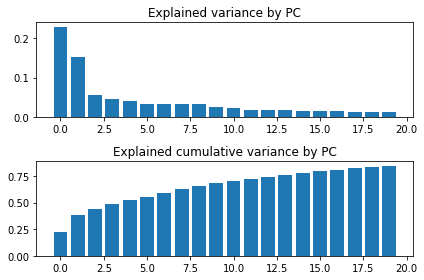

In [119]:
# plotting explained variance
fig, ax = plt.subplots(2, 1, tight_layout = True)
ax[0].bar(np.arange(n_components), pca.explained_variance_ratio_)
ax[0].set_title("Explained variance by PC")
ax[1].bar(np.arange(n_components), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title("Explained cumulative variance by PC")
print("Explained variance with last LT: ", np.cumsum(pca.explained_variance_ratio_)[-1])

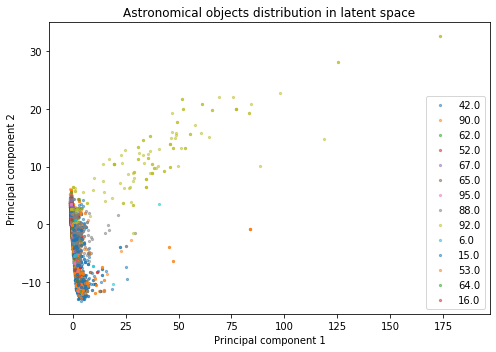

In [120]:
# plotting data projection with PCA
fig, ax  = plt.subplots(figsize = (7,5), tight_layout = True)
for label in pca_df.target.unique():
    
    ax.scatter(pca_df.loc[pca_df.target == label, 0], pca_df.loc[pca_df.target == label, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
#     ax.scatter(pca_df.iloc[:, 4], pca_df.iloc[:, 5], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
    ax.set_xlabel("Principal component 1")
    ax.set_ylabel("Principal component 2")
    ax.set_title("Astronomical objects distribution in latent space")
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))
    

# Dimensionality reduction with Autoencoder

In [67]:
import torch

# Building autoencoder
class Encoder(torch.nn.Module):
    
    def __init__(self, latent_dim, input_dim = len(features_names), hidden_dim = 10):

        super(Encoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(input_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.code = torch.nn.Linear(hidden_dim, latent_dim)
        self.activation = torch.nn.Softplus()

    def forward(self, x):
        
        output = self.activation(self.hidden_1(x))
        output = self.activation(self.hidden_2(output))
        
        return (self.code(output))

class Decoder(torch.nn.Module):
    
    def __init__(self, latent_dim, output_dim = len(features_names), hidden_dim = 10):
        super(Decoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.decode = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.Softplus()
        
    def forward(self, z):
#         print("Decoder")
        output = self.activation(self.hidden_1(z))
        output = self.activation(self.hidden_2(output))
        
        return (self.decode(output))
        
class AutoEncoder(torch.nn.Module):
    
    def __init__(self, latent_dim,):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
        
    def forward(self, x):
        
        return self.decoder(self.encoder(x))

In [68]:
from torch.utils import data

# model = AutoEncoder(latent_dim = 1)

# Create dataset
torch_data = torch.from_numpy(std_features_light_curves).float()
torch_targets = torch.tensor(features_light_curves.iloc[:, -1].values).float()

dataset = data.TensorDataset(torch_data,torch_targets) # create your datset
train_loader = data.DataLoader(dataset, batch_size=256) # create your dataloader

In [72]:
from tqdm import tqdm_notebook

model = AutoEncoder(latent_dim = 2)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

use_gpu = False

if use_gpu:
    model = model.cuda()
    
# fig, ax = plt.subplots()

for nepoch in tqdm_notebook(range(10)):
    
#     print(nepoch)
    
    epoch_loss = 0
    
    for data, label in train_loader:
        
        optimizer.zero_grad()
        
        outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print("Epoch {0} loss: {1}".format(nepoch, epoch_loss))

Epoch 0 loss: -164135995737.63257
Epoch 1 loss: -123173547572224.0
Epoch 2 loss: -4114638341931008.0
Epoch 3 loss: -4.040411709649715e+16
Epoch 4 loss: -2.1107170253943603e+17
Epoch 5 loss: -7.579870634956554e+17
Epoch 6 loss: -2.1315435576332124e+18
Epoch 7 loss: -5.05310359081871e+18
Epoch 8 loss: -1.056802150432532e+19
Epoch 9 loss: -2.0088493029093016e+19



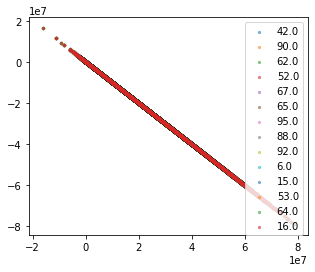

In [74]:
# get latent representation of data
latent_representation = model.encoder(torch_data.type(torch.FloatTensor)).detach().numpy()

# Creating new DF
autoencoder_df = pd.DataFrame(data = latent_representation
             , columns = ['lv 1', 'lv 2'])

# autoencoder_df["object_id"] = object_ids
autoencoder_df["target"] = features_light_curves["target"].values
autoencoder_df.head()

# plotting latent representation
fig, ax  = plt.subplots(figsize = (5,4))
for label in autoencoder_df.target.unique():
    
    ax.scatter(autoencoder_df["lv 1"], autoencoder_df["lv 2"], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))

# Supervised classification

In [128]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# LR with PCA
clf = LogisticRegression(random_state=0).fit(pca_df.iloc[:, 0:(pca_df.columns.shape[0] - 1)], pca_df["target"])
print("Score with PCA: ", clf.score(pca_df.iloc[:, 0:(pca_df.columns.shape[0] - 1)], pca_df.iloc[:, -1]))


# # # LR with Autoencoder
# clf = LogisticRegression(random_state=0).fit(autoencoder_df[["lv 1", "lv 2"]], autoencoder_df["target"])
# print("Score with Autoencoder: ", clf.score(autoencoder_df.iloc[:, 0:2], autoencoder_df.iloc[:, -1]))

# LR with raw data
clf = LogisticRegression(random_state=0).fit(features_light_curves.iloc[:, 0:(features_light_curves.columns.shape[0] - 1)], features_light_curves["target"])
print("Score with raw data: ", clf.score(features_light_curves.iloc[:, 0:(features_light_curves.columns.shape[0] - 1)], features_light_curves["target"]))

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score with PCA:  0.5017410959740973


/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score with raw data:  0.4922108864316696


/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
